In [1]:
from imports import *
from agents import BetaAgent
from model import Model
from network_utils import *
from network_randomization import *
from network_generation import *
from simulation_functions import *

# Testing

In [2]:
n_simulations = 100
G_default = barabasi_albert_directed(100,5)

num_cores = cpu_count()  # Get the number of available CPU cores
print(num_cores)

# Define a partial function to pass G_perceptron to generate_parameters_empir
# This ensures that generate_parameters_empir is called with the correct argument within the pool
# The 'partial' function allows you to create a new function with some of the arguments pre-filled.
from functools import partial
generate_params_with_G = partial(generate_parameters, G=G_default)

with Pool(num_cores) as pool:
    # Use tqdm to display a progress bar
    # Now, 'generate_params_with_G' is the function that will be executed by each worker.
    # Each worker will receive an index from 'range(n_simulations)' as its argument,
    # which is ignored in 'generate_params_with_G' but is required by the 'imap_unordered' function.
    param_dict = list(tqdm.tqdm(pool.imap_unordered(generate_params_with_G, range(n_simulations)), total=n_simulations))

4


100%|██████████| 100/100 [00:03<00:00, 25.31it/s]


In [3]:
print(len(param_dict))
param_dict[0]

100


{'randomized': True,
 'unique_id': '5e7acf1999c743f8a72920b7841e27b1',
 'n_agents': 100,
 'network': <networkx.classes.digraph.DiGraph at 0x1276a6810>,
 'uncertainty': 0.0017419733454940183,
 'n_experiments': 2,
 'p_rewiring': 0.3921909538567388,
 'average_degree': 4.85,
 'degree_gini_coefficient': np.float64(0.5897938144329897),
 'approx_average_clustering_coefficient': 0.11339819436481417,
 'degree_entropy': np.float64(2.2338918489493516)}

In [5]:
# Run simulations in parallel
with Pool(num_cores) as pool:
    simulation_results = list(tqdm.tqdm(pool.imap_unordered(run_simulation_wrapper, param_dict),
                                        total=len(param_dict), desc="Running simulations"))

# Convert results to a DataFrame
basic_results_df = pd.DataFrame(simulation_results)
display(basic_results_df)

TypeError: list indices must be integers or slices, not str

In [ ]:
basic_results_df.to_csv("basic_results_df.csv", index=False)  # Saves without index

# Basic Plotting

In [ ]:
def scatter_plot(df, target_variable="share_of_correct_agents_at_convergence"):
     # Select numerical columns excluding unique ID and target variable
    numerical_columns = df.select_dtypes(include=["number"]).columns.tolist()
    numerical_columns.remove(target_variable)  # Remove target variable from independent variables

    # Generate scatter plots for each numerical column against the target variable
    num_plots = len(numerical_columns)
    fig, axes = plt.subplots(nrows=(num_plots + 1) // 2, ncols=2, figsize=(10, num_plots * 2))
    axes = axes.flatten()

    for i, column in enumerate(numerical_columns):
        axes[i].scatter(df[column], df[target_variable], alpha=0.5)
        axes[i].set_xlabel(column)
        axes[i].set_ylabel(target_variable)
        axes[i].set_title(f"{column} vs {target_variable}")
        axes[i].grid(True)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

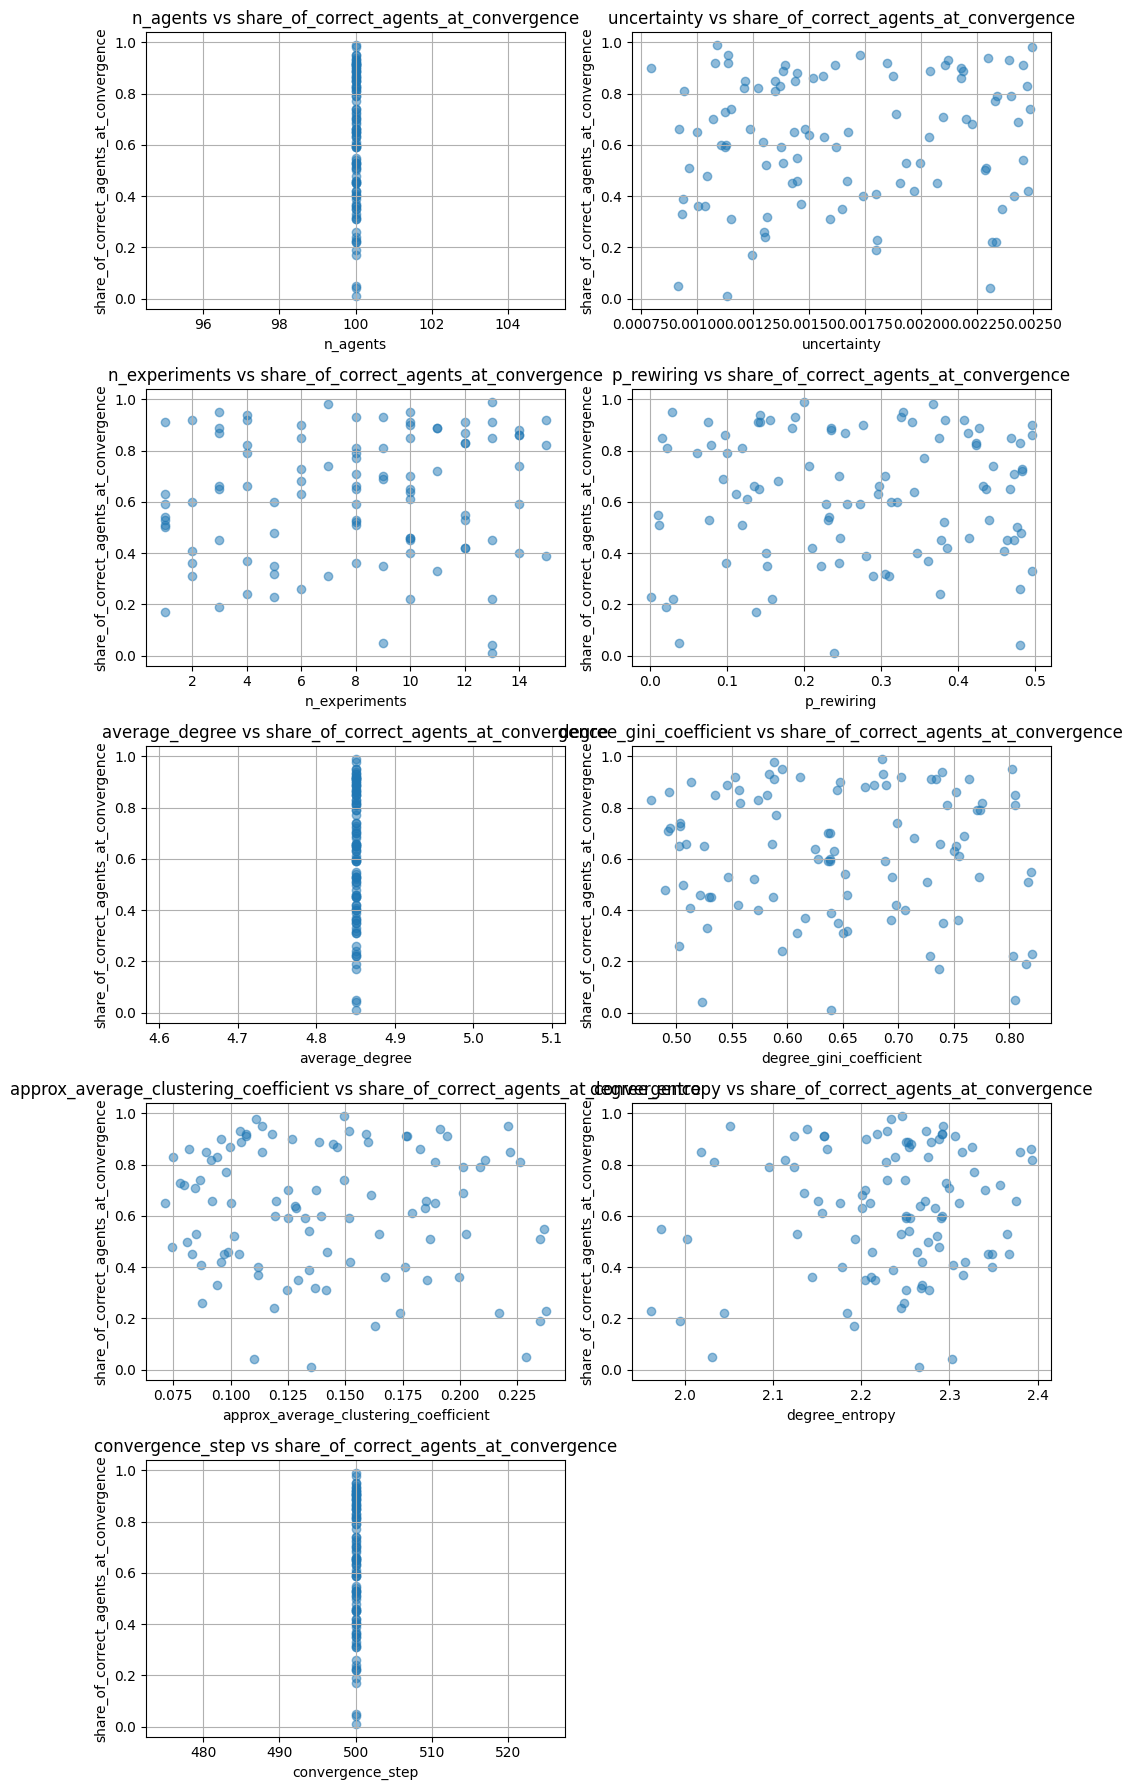

In [ ]:
scatter_plot(basic_results_df)

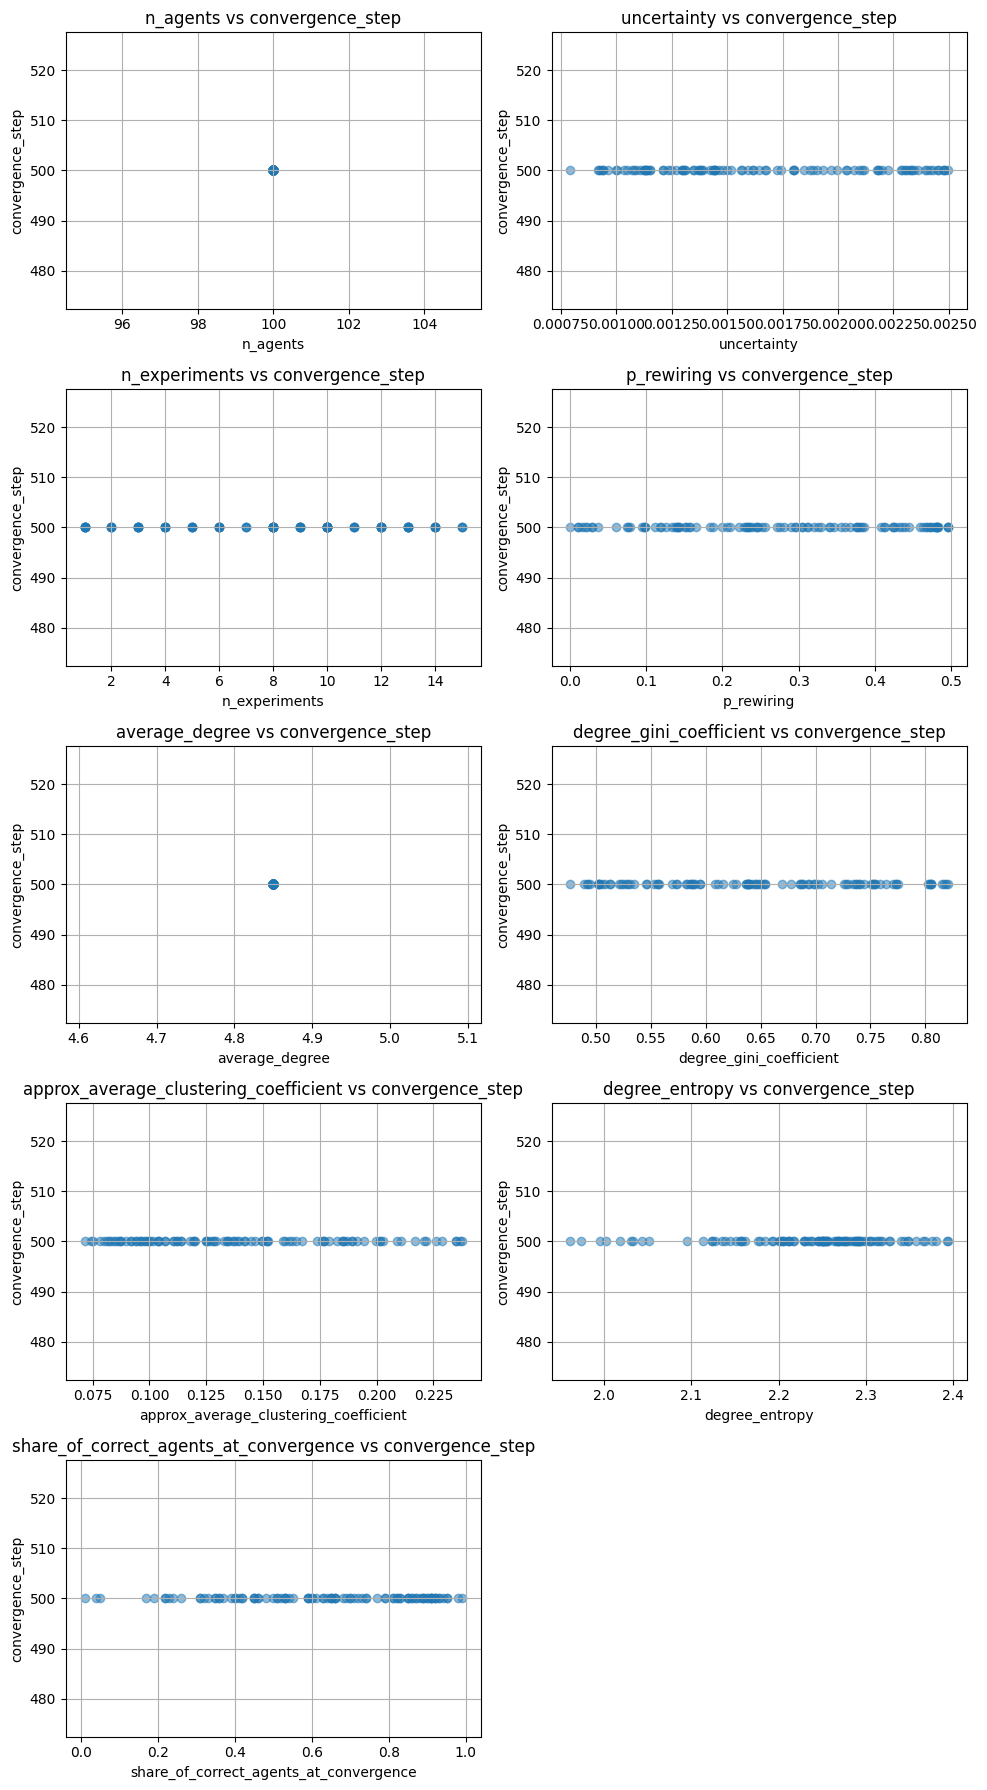

In [ ]:
scatter_plot(basic_results_df, target_variable="convergence_step")